In [4]:
import numpy as np
from functions import *
import matplotlib.pyplot as plt
from time import time

     
root2, root3 = np.sqrt(2), np.sqrt(3) 

H_COEFFS4 = np.array([(1 + root3) / (4 * root2),
                     (3 + root3) / (4 * root2),
                     (3 - root3) / (4 * root2),
                     (1 - root3) / (4 * root2)
                     ])

G_COEFFS4 = np.array([H_COEFFS4[3], 
                    -H_COEFFS4[2],
                     H_COEFFS4[1], 
                    -H_COEFFS4[0]])


H_COEFFS8 = np.array([0.23037781, 0.71484657, 0.63088076, -0.02798376, -0.18703481, 0.03084138, 0.03288301, -0.01059740])
G_COEFFS8 = np.array([-0.01059740, -0.03288301, 0.03084138, 0.18703481, -0.02798376, -0.63088076, 0.71484657, -0.23037781])



H_COEFFS16 = np.array([
    0.003335725285001549, -0.012580751999015526, -0.006241490213011705, 0.07757149384006515,
    -0.03224486958502952, -0.2422948870663824, 0.13842814590110342, 0.7243085284385744,
    0.6038292697974729, 0.16015649926452906, -0.02763061049750777, -0.07872200106262882,
    0.01657454163101562, 0.02655983400500179, -0.007800708325034148, -0.003120141709222267
]) 

G_COEFFS16 = np.array([
    -0.003335725285001549, -0.012580751999015526, 0.006241490213011705, 0.07757149384006515,
    0.03224486958502952, -0.2422948870663824, -0.13842814590110342, 0.7243085284385744,
    -0.6038292697974729, 0.16015649926452906, 0.02763061049750777, -0.07872200106262882,
    -0.01657454163101562, 0.02655983400500179, 0.007800708325034148, -0.003120141709222267
])


In [5]:
photo = 'images/imagen.jpg'

0.25151872634887695


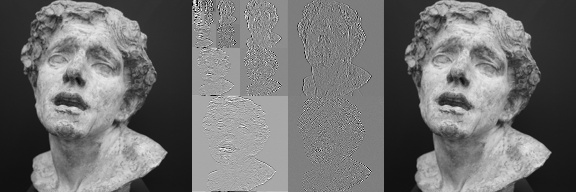

In [6]:
initial_time = time() 

array_photo = jpg_to_pgm(photo)
daubechies_4 = function_daubechies_coeffs(array_photo,H_COEFFS4,G_COEFFS4)
scale, width = 5, array_photo.shape[0]
result_img, normalized = daubechies4_wavelet_transform_2D(daubechies_4,array_photo,scale,width,H_COEFFS4,G_COEFFS4)
# result_img = zeros(result_img, scale)

reconstructed4 = inverse_daubechies4_wavelet_transform_2D(daubechies_4,result_img,scale,width,H_COEFFS4,G_COEFFS4)

final_time = time() 
print(final_time - initial_time)

imshow(np.concatenate((array_photo, normalized, reconstructed4), axis = 1))

0.2460792064666748


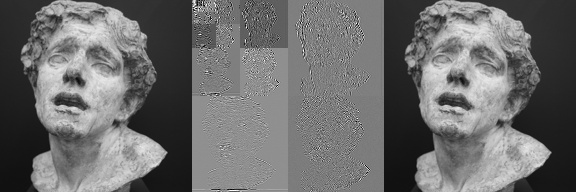

In [7]:
initial_time = time() 

array_photo = jpg_to_pgm(photo)
daubechies_4 = function_daubechies_coeffs(array_photo,H_COEFFS8,G_COEFFS8)
scale, width = 5, array_photo.shape[0]
result_img, normalized = daubechies4_wavelet_transform_2D(daubechies_4,array_photo,scale,width,H_COEFFS8,G_COEFFS8)
# result_img = zeros(result_img, scale)

reconstructed8 = inverse_daubechies4_wavelet_transform_2D(daubechies_4,result_img,scale,width,H_COEFFS8,G_COEFFS8)

final_time = time() 
print(final_time - initial_time)

imshow(np.concatenate((array_photo, normalized, reconstructed8), axis = 1))

0.23438525199890137


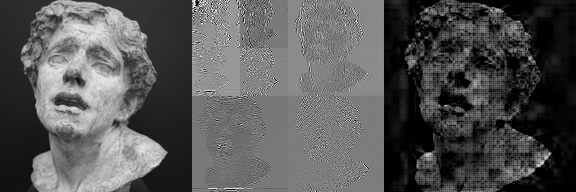

In [8]:
initial_time = time() 

array_photo = jpg_to_pgm(photo)
daubechies_4 = function_daubechies_coeffs(array_photo,H_COEFFS16,G_COEFFS16)
scale, width = 5, array_photo.shape[0]
result_img, normalized = daubechies4_wavelet_transform_2D(daubechies_4,array_photo,scale,width,H_COEFFS16,G_COEFFS16)
# result_img = zeros(result_img, scale)

reconstructed16 = inverse_daubechies4_wavelet_transform_2D(daubechies_4,result_img,scale,width,H_COEFFS16,G_COEFFS16)

final_time = time() 
print(final_time - initial_time)

imshow(np.concatenate((array_photo, normalized, reconstructed16), axis = 1))

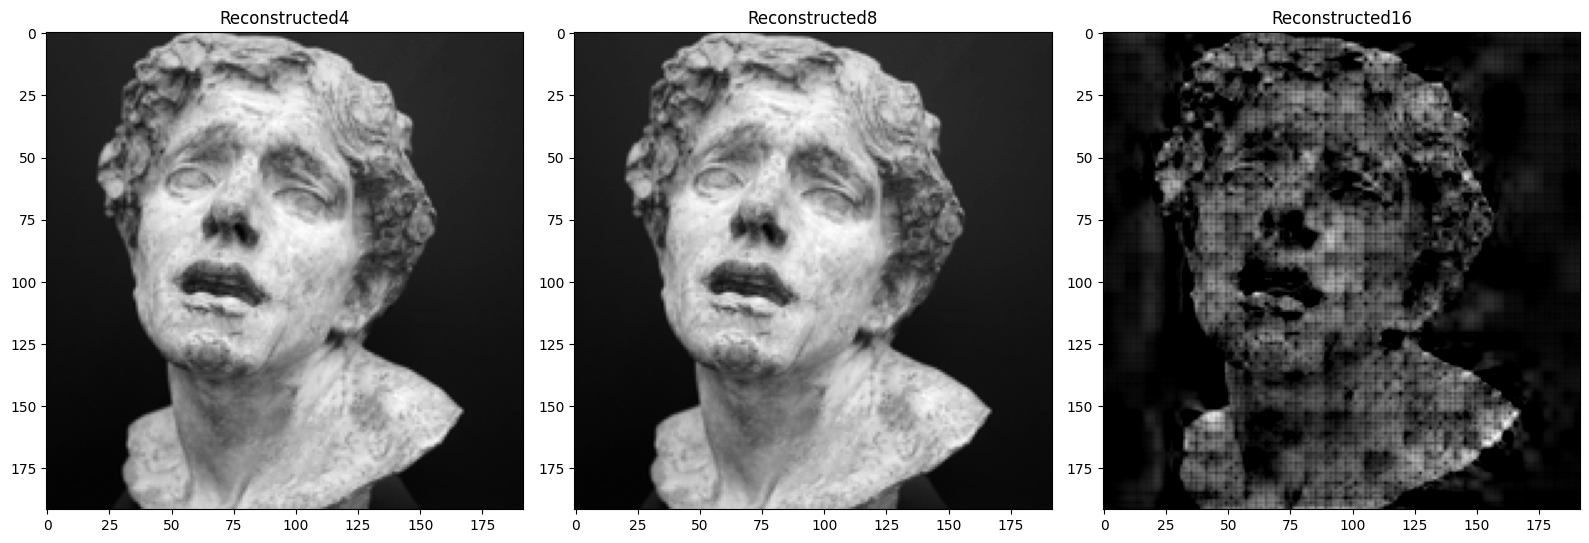

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(16, 7))
axes[0].imshow(reconstructed4, cmap='gray')
axes[0].set_title('Reconstructed4')
axes[1].imshow(reconstructed8, cmap='gray')
axes[1].set_title('Reconstructed8')
axes[2].imshow(reconstructed16, cmap='gray',vmin=0)
axes[2].set_title('Reconstructed16')
plt.tight_layout()
plt.show()


# imshow(np.concatenate((reconstructed4, reconstructed8, reconstructed16), axis = 1))